# Dibujando Múltiples Series de Datos

## Objetivos de la sesión

En esta sesión aprenderemos a usar los siguientes gráficos para dibujar múltiples series de datos:

- Gráficos de líneas múltiples
- Gráficos de barras múltiples
- Matrices de dispersión

Aprenderemos a utilizar estas visualizaciones usando matplotlib, la API de Pandas de matplotlib o Seaborn cuando sea necesario.

## Introducción

Hay muchos casos en los que una visualización más elaborada puede ayudarnos a entender mejor nuestros datos. En esta sesión aprenderemos a generar este tipo de visualizaciones.

### Diagramas de lineas múltiples

Si recordamos nuestro conjunto de datos de vehículos, se nos puede ocurrir comparar la relación entre el MPG de la ciudad (`city MPG`) y el MPG de la carretera (`highway MPG`) en función de las emisiones de CO2 (`CO2 emissions`).

Para ello, podemos usar la función .plot en Pandas. Con esta función, podemos especificar qué variables estarán en el eje x y cuáles en el eje y. Pondremos las emisiones de CO2 en el eje x y las variables MPG en el eje y.

Para obtener una visualización con sentido primero debemos ordenar nuestro DataFrame por estas variables. Python no va a ordenar nuestras variables por defecto, simplemente conectará una línea entre dos puntos cualesquiera del gráfico que sean secuenciales, y esto puede dar lugar a un gráfico muy confuso.

En los siguientes ejemplos de código utilizamos el conjunto de datos de vehículos.

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
vehicles = pd.read_csv('./data/vehicles/vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


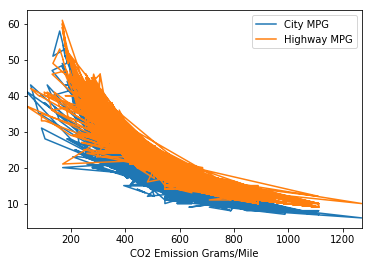

In [4]:
vehicles.plot(x="CO2 Emission Grams/Mile", y=["City MPG", "Highway MPG"])

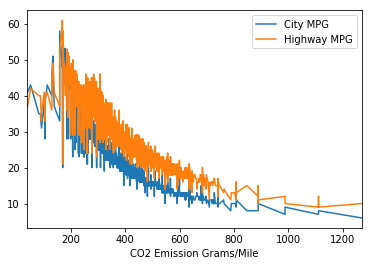

In [5]:
vehicles.sort_values(by=["CO2 Emission Grams/Mile", "City MPG", "Highway MPG"], inplace=True)
vehicles.plot(x="CO2 Emission Grams/Mile", y=["City MPG", "Highway MPG"])

### Diagramas de barras múltiples

Cuando se representan datos categóricos, es útil dibujar dos o más grupos uno al lado del otro y poder compararlos. Hay varias formas de crear un diagrama así.

#### Diagramas de barra uno al lado del otro
Si incluimos varias columnas en nuestro gráfico de barras, se mostrarán una al lado de la otra con diferentes colores.
En el ejemplo de abajo agregamos `highway MPG` y `city MPG` en función de ` drivetrain`. Dado que un gráfico de barras representará un valor por cada grupo, agregaremos y calcularemos la media.

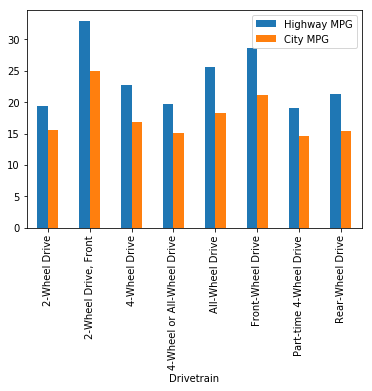

In [6]:
vehicles_mean = vehicles[["Highway MPG", "City MPG", "Drivetrain"]].groupby(["Drivetrain"]).agg("mean")
vehicles_mean.plot.bar()

#### Diagramas de barras horizontales uno al lado del otro
Podemos usar la función .barh para crear barras horizontales.

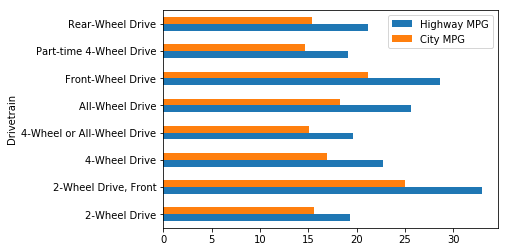

In [8]:
vehicles_mean.plot.barh()

### Matrices de dispersión
Una matriz de dispersión es una herramienta útil, particularmente en el análisis exploratorio de datos. Podemos ver las relaciones por pares entre múltiples variables al mismo tiempo. Típicamente lo que buscamos son relaciones lineales entre pares de variables. Esta información puede ayudarnos en el futuro a modelar los datos. También hay relaciones no lineales que podemos detectar como una relación logarítmica o exponencial entre dos variables. En este caso, podemos aplicar una transformación a las variables para producir una relación lineal.

Usaremos la función `scatter_matrix`. Esta función creará una gráfica de dispersión para dos variables numéricas cualquiera en nuestros datos.

Por defecto, la matriz de dispersión muestra el histograma de cada variable a lo largo de la diagonal. También podemos mostrar la estimación de la densidad del núcleo a lo largo de la diagonal.

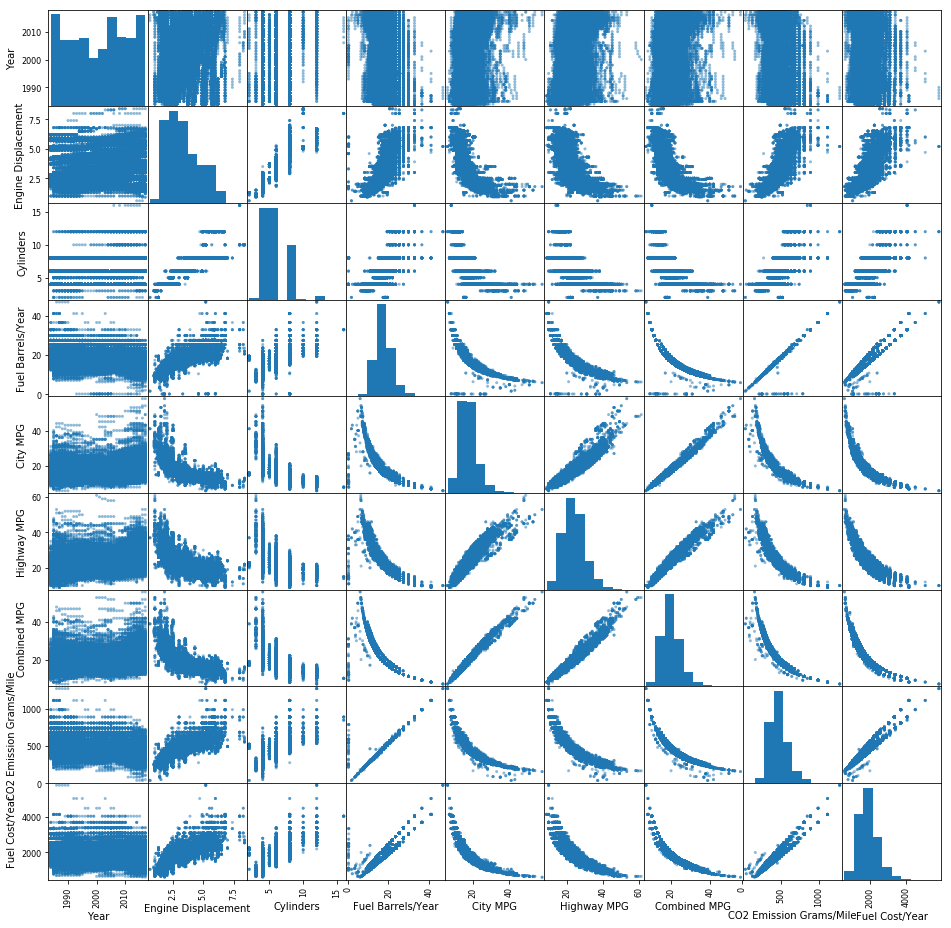

In [16]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(vehicles, figsize=(16, 16))
plt.show()

Esta visualización puede parecer un poco desordenada, pero nos dice mucho sobre nuestros datos. Las principales conclusiones son que existe una relación lineal entre el MPG combinado, el MPG de la ciudad y el MPG de la carretera. Existe una relación no lineal entre el MPG y las emisiones de CO2 y el MPG y el coste del combustible por año. La relación entre esos pares de variables podría beneficiarse de una transformación para hacer que esas relaciones sean lineales.

In [17]:
import numpy as np
vehicles['Log Combined MPG'] = np.log(vehicles['Combined MPG'])

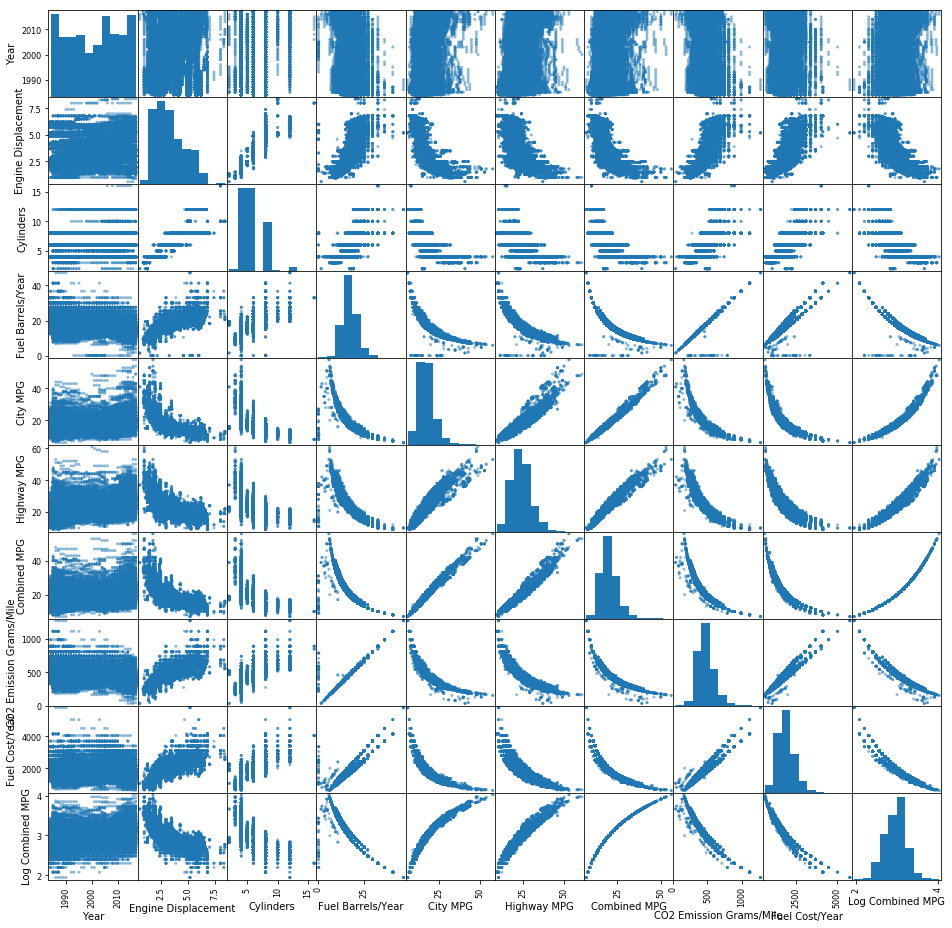

In [18]:
pd.plotting.scatter_matrix(vehicles, figsize=(16, 16))
plt.show()

## Resumen
En esta lección hemos aprendido a representar varias piezas de información en un solo gráfico. Dibujamos dos gráficos de líneas en un solo cuadro, así como dos gráficos de barras. Además, creamos un gráfico de dispersión con todas las combinaciones por pares en un conjunto de datos. Estos gráficos pueden ser muy útiles; sin embargo, debemos realizar transformaciones de datos apropiadas a veces para hacerlos más interpretables. Los fragmentos de código presentados en esta lección servirán como plantilla para crear visualizaciones de conjuntos de datos propios para cada proyecto.